In [1]:
# importing all the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
#importing and reading the dataset
dataset=pd.read_csv("Student Study Hour V2.csv")

In [4]:
#the first five values in the dataset
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
#number of rows and columns
dataset.shape

(28, 2)

In [6]:
dataset.describe()

,Hours,Scores
count,28.000000,28.000000
mean,4.832143,49.964286
std,2.530562,25.041421
min,1.100000,17.000000
25%,2.675000,29.250000
50%,4.650000,44.500000
75%,7.025000,70.500000
max,9.200000,95.000000


# Visualization

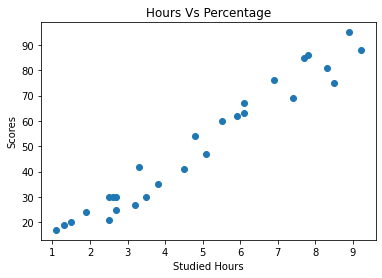

In [7]:
#Hours Vs Percentage of SCores
plt.scatter(dataset['Hours'],dataset['Scores'])
plt.title('Hours Vs Percentage')
plt.xlabel('Studied Hours')
plt.ylabel('Scores')
plt.show()

# Train-Test Split

In [9]:
#X will take all the values except for the last column which is our dependent variable(target variable)
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=0)

# Training the Simple Linear Regressing model on the Training set

In [12]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

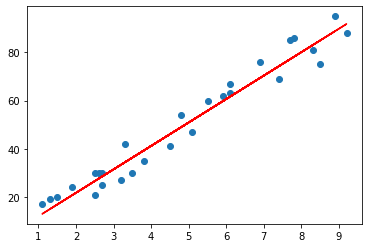

In [17]:
#plotting the regression  the line
line=regressor.coef_*x+regressor.intercept_
#plotting for the test data
plt.scatter(x,y)
plt.plot(x,line,color='red')
plt.show()

In [20]:
# predicting the test set results
y_pred=regressor.predict(X_test)
print(y_pred)

[33.40234665 39.24098979 12.96709563 20.75195316 16.8595244  59.6762408
 78.16527743 34.37545384 28.53681069]


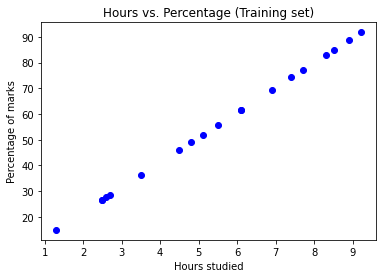

In [22]:
# Visualising the Training set results
plt.scatter(X_train,regressor.predict(X_train),color='blue')
plt.title('Hours vs. Percentage (Training set)')
plt.xlabel('Hours studied')
plt.ylabel('Percentage of marks')
plt.show()

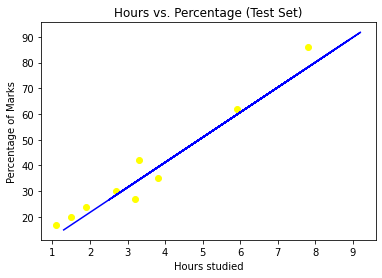

In [23]:
# Visualising the Test set results
plt.scatter(X_test,y_test,color='yellow')
plt.plot(X_train,regressor.predict(X_train),color='blue')
plt.title('Hours vs. Percentage (Test Set)')
plt.xlabel('Hours studied')
plt.ylabel('Percentage of Marks')
plt.show()

In [24]:
#comparing the actual values with the predicted ones
dataset=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
dataset

,Actual,Predicted
0,27,33.402347
1,35,39.240990
2,17,12.967096
3,24,20.751953
4,20,16.859524
5,62,59.676241
6,86,78.165277
7,42,34.375454
8,30,28.536811


In [26]:
# predicting the score
dataset=np.array(9.25)
dataset=dataset.reshape(-1,1)
pred=regressor.predict(dataset)
print("If the student studies for 9.25 hours/day, the score is{}.". format(pred))

If the student studies for 9.25 hours/day, the score is[92.2753317].


# Error Metrics

In [27]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error: 4.47899783087591


In [30]:
from sklearn.metrics import r2_score
print("The R-square of the model is:",r2_score(y_test,y_pred))

The R-square of the model is: 0.945021915529883


# Conclusion
 # We used a Linear Regression Model to predict the score of a student if he/she studies for 9.25 hours/day and the predicted Score came out to be 92.27